In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import modules.eda as Detective
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

Đọc dữ liệu từ project 1 lên và sắp xếp lại dữ liệu

In [69]:
reviews = pd.read_csv("./data/normalize_reviews.csv").fillna("")
reviews = reviews[['raw_comment', 'normalize_comment', 'emoji', 'label']]

reviews.head()

,raw_comment,normalize_comment,emoji,label
0,Giao hàng kh đúng cần phê bình hjjjjjhhd...,giao hàng không đúng cần phê bình,,0
1,Chất lượng sản phẩm tạm được. Giao...,chất lượng sản phẩm tạm được giao ...,,0
2,Ko có lắc tay như hình,không có lắc tay như hình,,0
3,Giao hàng lâu. Bảo có lắc tay mà k thâ...,giao hàng lâu bảo có lắc tay mà không ...,,0
4,"Mình mua 2 cái, một dùng ok. Một cái k...",mua cái một dùng ok một cái không chạ...,😢,0


Ở phần này, chúng ta sẽ tập trung đi sâu vào mặt khám phá các từ ngữ, bây giờ chúng ta cùng xem bức tranh tổng thể trước. Cụ thể là trong dataset của chúng ta đâu là các từ vựng phổ biến. Chúng ta thực hiền điều này bằng một Python's package là **Wordcloud**:
  ```shell
  pip install wordcloud
  ```

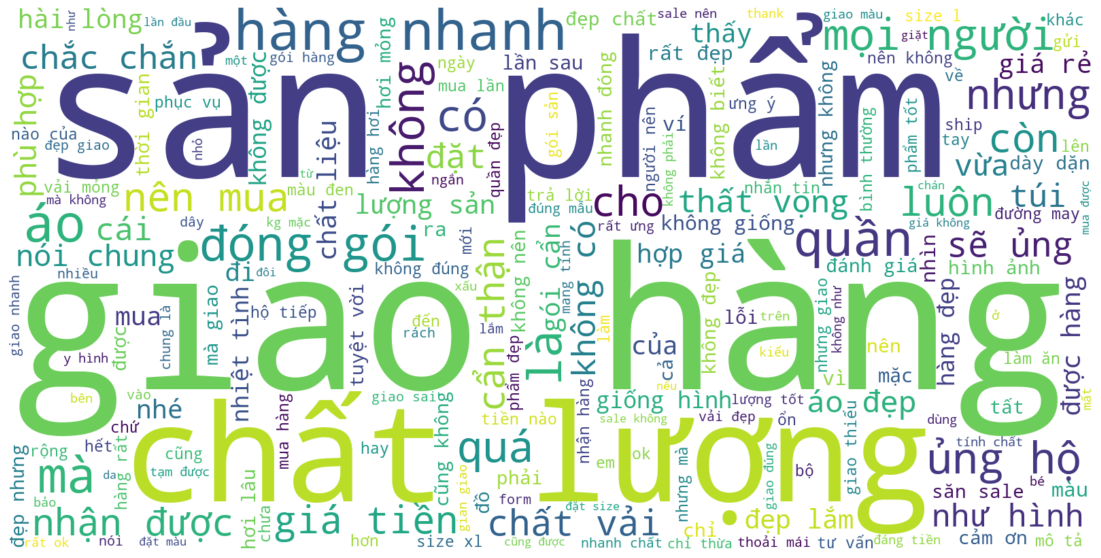

In [70]:
Detective.commentWordCloud(reviews['normalize_comment'])

> **Nhận xét**:
> * Nhìn chung, ở bước tiền xử lí dữ liệu ta đã xử lí khá tốt.
> * WordCloud tiện lợi trong việc cho ta cái nhìn tổng quát trên dữ liệu dạng text, cho ta thấy được các từ nào chồng chéo lên nhau trên các class.
> * Ngoài ra, nó giúp ta liệt kệ được rõ ràng các **từ ghép** quan trọng, các từ ghép sẽ có tần số xuất hiện gần nhau nên sẽ có font-size giống nhau - điển hình ở đây ta thấy được các từ như: sản phẩm, giao hàng, chất lượng,... Tuy nhiên với tôi các từ này không đem lại nhiều giá trị cho lắm, vì đây là trang bán hàng, comment nào cũng sẽ có những từ này, tức chúng xuất hiện nhiều nhưng không quan trọng, các ta quan tâm là các từ thể hiện cảm xúc của khách hàng. Ta có thể xem xét bổ sung chúng vào stop word sau này.

Tiếp theo, ta sẽ xem xét các từ nào hay xuất hiện trên từng specific class theo feature `label`.

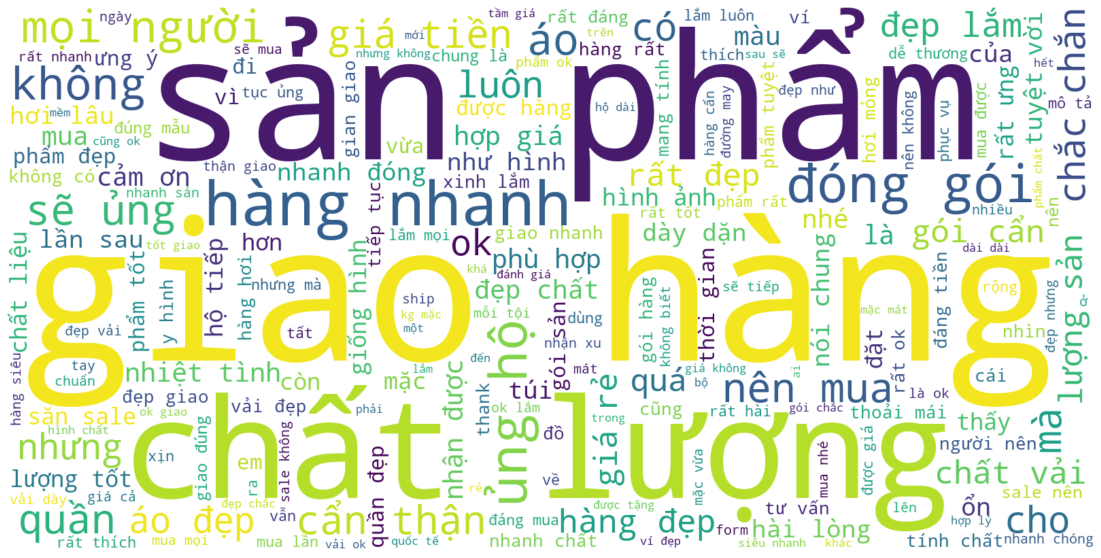

In [71]:
# xem theo label nhóm postive
Detective.commentWordCloud(reviews[reviews['label'] > 0]['normalize_comment'])

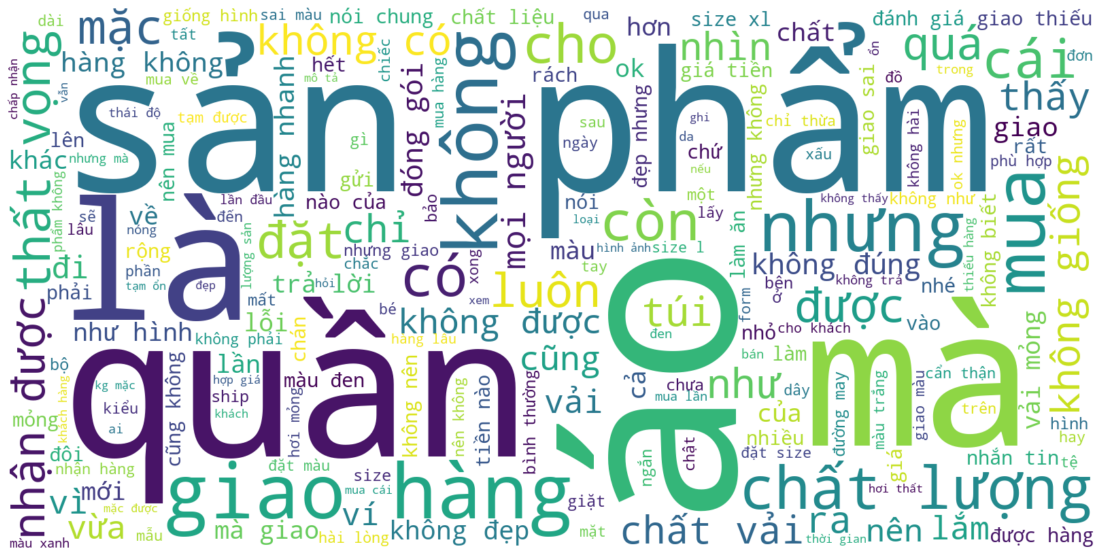

In [72]:
# xem theo label nhóm negative
Detective.commentWordCloud(reviews[reviews['label'] < 1]['normalize_comment'])

> **Nhận xét**:
> * Các cụm từ như: "sản phẩm", "giao hàng", "chất lượng" xuất hiện trên cả hai wordcloud của hai class. Nếu chúng ta sử dụng các model machine learning đơn giản, thì các từ này có thể gây ra sự bối rối cho model trong việc quyết định đâu là class tốt nhất. Giải pháp là chúng ta có thể xem xét và đưa chúng vào stopword.
> * WordCloud cung cấp cho ta cái nhìn nhanh và bức tranh tổng thể của text-data, và đây cũng là các hạn chế khi nó chỉ đơn giản zoom in từ ra và **XONG**, ta không có được một cái nhìn rõ ràng là từ **A** so với từ **B** nhiều hơn hay ít hơn bao nhiêu lần.

Để thấy được chi tiết sự khác nhau giữa về tần số mà các từ trong từng class xuất hiện. Một trong những cách khi gặp vấn đề này đối với cá nhân tôi là tôi sẽ áp dụng lần lượt các phương pháp là **Bag of words** rồi sau đó là **TF-IDF**, sau đó tôi chia thành các đoạn $[m, n]$ và thống kê frequency xem các từ nào mà nằm trong các đoạn này.

In [78]:
word_freq = Detective.createBagOfWordsFrequency(reviews['normalize_comment'])
print(len(word_freq))

3867


> **Nhận xét**:
> * Có tổng cộng hơn 3800 unique word xuất hiện trong dataset của chúng ta.

In [77]:
print(word_freq[:100])

[('không', 7310), ('hàng', 6249), ('giao', 4568), ('đẹp', 3987), ('chất', 3818), ('mua', 3485), ('áo', 3181), ('nhưng', 2856), ('được', 2799), ('rất', 2454), ('giá', 2451), ('mà', 2382), ('có', 2357), ('nên', 2284), ('sản', 2277), ('vải', 2270), ('phẩm', 2253), ('màu', 2182), ('nhanh', 2096), ('là', 1909), ('hơi', 1849), ('ok', 1838), ('quần', 1824), ('như', 1794), ('lượng', 1782), ('mặc', 1772), ('hình', 1704), ('lắm', 1685), ('size', 1680), ('quá', 1649), ('cho', 1545), ('cũng', 1432), ('tiền', 1406), ('cái', 1391), ('luôn', 1279), ('lần', 1269), ('mỏng', 1241), ('nhận', 1211), ('gói', 1201), ('tốt', 1174), ('đặt', 1148), ('sẽ', 1121), ('chỉ', 1098), ('đóng', 1085), ('người', 1072), ('đúng', 1010), ('khá', 947), ('hơn', 925), ('mọi', 897), ('nhiều', 869), ('hộ', 866), ('rẻ', 851), ('còn', 847), ('của', 824), ('ủng', 823), ('vừa', 808), ('giống', 774), ('ảnh', 774), ('lâu', 767), ('chắc', 761), ('nói', 708), 

> **Nhận xét**:
> * Trên đây là 100 từ có tần số xuất hiện nhiều nhất 

In [93]:
print(word_freq[-100:])

[('vấy', 1), ('chuya', 1), ('biên', 1), ('khẹp', 1), ('nhạ', 1), ('phan', 1), ('chap', 1), ('thổi', 1), ('chau', 1), ('hốt', 1), ('lự', 1), ('khứ', 1), ('thạn', 1), ('nhí', 1), ('úi', 1), ('title', 1), ('kị', 1), ('íu', 1), ('đuối', 1), ('tám', 1), ('riết', 1), ('mòng', 1), ('xún', 1), ('trụ', 1), ('thuần', 1), ('camera', 1), ('chíu', 1), ('nuột', 1), ('đoá', 1), ('sê', 1), ('rang', 1), ('nhậu', 1), ('win', 1), ('nguyện', 1), ('ị', 1), ('mạp', 1), ('pop', 1), ('diệt', 1), ('khuẩn', 1), ('spandex', 1), ('khang', 1), ('thịnh', 1), ('vượng', 1), ('satin', 1), ('nhíu', 1), ('nếm', 1), ('măm', 1), ('péo', 1), ('dìa', 1), ('đe', 1), ('chót', 1), ('nhứt', 1), ('xon', 1), ('sạt', 1), ('chủng', 1), ('sán', 1), ('ến', 1), ('rụm', 1), ('củm', 1), ('sếp', 1), ('xá', 1), ('fandom', 1), ('nó', 1), ('xín', 1), ('nư', 1), ('giường', 1), ('vườn', 1), ('dỡ', 1), ('khuân', 1), ('gượng', 1), ('hủ', 1), ('loai', 1), ('iêu', 

> **Nhận xét**:
> * Đây là 100 từ có tần số xuất hiện ít nhất trong dataset. Chúng không đem lại tri thức cho model nhiều, chúng ta có thể cân nhắc trong việc xem xét và loại bỏ chúng khỏi các sentence để giảm tải input vector giúp model build nhanh hơn và chính xác hơn sau này.

Ta cũng nên kiểm tra xem các từ có tần số xuất hiện sao cho $\in [m, n]$ nào đó.

In [94]:
tmp = Detective.bagOfWordsGetRangeBased(word_freq, (100, 200))
print(len(tmp))
print(tmp)

144
[('in', 198), ('mặt', 196), ('bao', 195), ('lúc', 195), ('nếu', 194), ('tưởng', 193), ('mái', 193), ('chịu', 187), ('tuy', 184), ('thành', 184), ('cùng', 181), ('đồng', 180), ('nghĩ', 179), ('thoải', 178), ('ơi', 176), ('thứ', 176), ('loại', 174), ('chụp', 174), ('qua', 173), ('mùi', 172), ('ghi', 171), ('đều', 170), ('kẹp', 170), ('dáng', 169), ('từ', 169), ('giờ', 169), ('độ', 169), ('hộp', 168), ('phần', 168), ('xíu', 167), ('tóc', 167), ('đây', 166), ('váy', 164), ('tầm', 164), ('nhất', 160), ('liên', 160), ('hôm', 159), ('vòng', 157), ('kĩ', 157), ('cứng', 156), ('cổ', 154), ('sắc', 152), ('xem', 152), ('yêu', 151), ('chút', 151), ('bỏ', 150), ('thương', 149), ('nhiên', 149), ('báo', 149), ('cứ', 149), ('chỗ', 148), ('s', 148), ('tế', 148), ('số', 147), ('chiếc', 145), ('bung', 144), ('xong', 144), ('xám', 144), ('dính', 143), ('tục', 141), ('kéo', 141), ('tâm', 140), ('nặng', 139), ('kính', 138), (

> **Nhận xét**:
> * Phía trên là khoảng hơn 100 từ có tấn số xuất hiện $\in [100, 200]$ lần trong toàn bộ dataset.
> * Ta hoàn toàn có thể trực quan toàn bộ chúng lên một histogram để xem phân bố về tần số xuất hiện của các từ, ở đây bin-size sẽ là 50.